<a href="https://colab.research.google.com/github/peaceemenike/Artificial-Intelligent/blob/main/Maze%20Solver%20using%20DFS%20and%20BFS/Maze_Solver_Using_DFS_%26_BFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DFS Path:
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (2, 5), (3, 5), (3, 6), (3, 7), (3, 8), (2, 8), (1, 8)]

BFS Path (Shortest):
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (3, 6), (3, 7), (3, 8), (2, 8), (1, 8)]

--- DFS Visualization ---


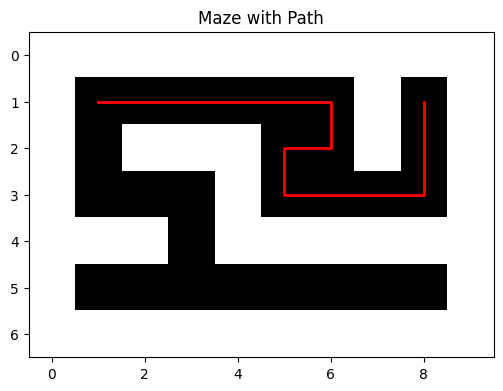


--- BFS Visualization (Shortest Path) ---


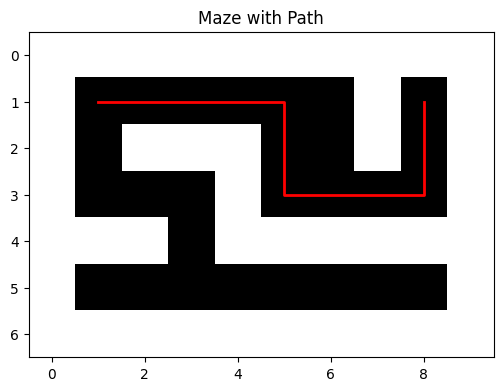

In [ ]:
# PROJECT 1: Maze Solver Using DFS and BFS
import sys
from collections import deque
import matplotlib.pyplot as plt
import numpy as np


# Maze Definition

maze = [
    "##########",
    "#A     #B#",
    "# ###  # #",
    "#   #    #",
    "### ######",
    "#        #",
    "##########"
]

ROWS = len(maze)
COLS = len(maze[0])



# Helper Functions
def find_position(symbol):
    """Find start (A) or goal (B) in the maze."""
    for r in range(ROWS):
        for c in range(COLS):
            if maze[r][c] == symbol:
                return (r, c)
    return None


def get_neighbors(position):
    """Return valid neighbor moves (Up, Down, Left, Right)."""
    r, c = position
    directions = [(r-1, c), (r+1, c), (r, c-1), (r, c+1)]
    neighbors = []

    for nr, nc in directions:
        if 0 <= nr < ROWS and 0 <= nc < COLS:
            if maze[nr][nc] != "#":  # Not a wall
                neighbors.append((nr, nc))

    return neighbors



# DFS Implementation
def dfs(start, goal):
    """Depth-First Search (LIFO stack)."""
    stack = [(start, [start])]
    visited = set()

    while stack:
        position, path = stack.pop()

        if position == goal:
            return path

        if position in visited:
            continue

        visited.add(position)

        for neighbor in get_neighbors(position):
            if neighbor not in visited:
                new_path = path + [neighbor]
                stack.append((neighbor, new_path))

    return None


# BFS Implementation
def bfs(start, goal):
    """Breadth-First Search (FIFO queue). Finds shortest path."""
    queue = deque([(start, [start])])
    visited = set()

    while queue:
        position, path = queue.popleft()

        if position == goal:
            return path

        if position in visited:
            continue

        visited.add(position)

        for neighbor in get_neighbors(position):
            if neighbor not in visited:
                new_path = path + [neighbor]
                queue.append((neighbor, new_path))

    return None

# BOTH ALGORITHMS
start = find_position("A")
goal = find_position("B")

dfs_path = dfs(start, goal)
bfs_path = bfs(start, goal)

print("DFS Path:")
print(dfs_path)
print("\nBFS Path (Shortest):")
print(bfs_path)



# Visualization
def draw_maze(path=None):
    grid = []
    for r in range(ROWS):
        row = []
        for c in range(COLS):
            if maze[r][c] == "#":
                row.append(0)
            else:
                row.append(1)
        grid.append(row)

    grid = np.array(grid)

    plt.figure(figsize=(6,6))
    plt.imshow(grid, cmap="gray_r")

    if path:
        pr = [p[0] for p in path]
        pc = [p[1] for p in path]
        plt.plot(pc, pr, color="red", linewidth=2)

    plt.title("Maze with Path")
    plt.show()


print("\n--- DFS Visualization ---")
draw_maze(dfs_path)

print("\n--- BFS Visualization (Shortest Path) ---")
draw_maze(bfs_path)
